# **Assignment 3: Image Classification**

**Objective:**

Develop a deep learning model to classify images from the Stanford Dogs dataset. The goal is to experiment with different neural network architectures and optimization techniques to achieve the best possible classification accuracy.

**Dataset:**

Use the Stanford Dogs DatasetLinks to an external site. available in TensorFlow Datasets. This dataset contains images of 120 breeds of dogs from around the world and is commonly used for fine-grained image categorization.

# **1. Data Preprocessing**

In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2

*   Load the dataset using TensorFlow Datasets

In [2]:
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteRZTT14/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteRZTT14/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [3]:
# Number of classes
num_classes = ds_info.features['label'].num_classes

*   Perform necessary preprocessing steps like resizing images, normalizing pixel values, etc.



In [4]:
def preprocess(image, label):
    # Resize the images to a fixed size
    image = tf.image.resize(image, [224, 224])
    # Normalize the pixel values
    image = image / 255.0
    return image, label

# **2. Model Building**

*  Design a convolutional neural network (CNN) for this multi-class classification task.
*   Include various types of layers such as Convolutional Layers, Pooling Layers, Dropout Layers, and Fully Connected Layers.
*   Experiment with different numbers of layers and varying numbers of neurons.




# **3. Model Training and Optimization**

*   Split the dataset into training, validation, and test sets.
*   Choose an appropriate loss function and optimizer for training the model.
*   Implement callbacks like Early Stopping and Model Checkpoints to optimize the training process.




**2.1 AlexNet Model**

*   **Model Building**






In [ ]:
# Apply the preprocessing function to your dataset
alexnet_ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
alexnet_ds_validation = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
alexnet_ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
alexnet_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48,(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 48)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     55424     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 192)       221376    
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 192)       3

*   **Model Training**





In [ ]:
alexnet_history = alexnet_model.fit(
    alexnet_ds_train,
    epochs = 10,
    validation_data=alexnet_ds_validation
)

Epoch 1/10
263/263 [==============================] - 51s 158ms/step - loss: 4.8066 - accuracy: 0.0073 - val_loss: 4.7904 - val_accuracy: 0.0028
Epoch 2/10
263/263 [==============================] - 40s 153ms/step - loss: 4.7888 - accuracy: 0.0083 - val_loss: 4.7915 - val_accuracy: 0.0028
Epoch 3/10
263/263 [==============================] - 40s 153ms/step - loss: 4.7880 - accuracy: 0.0085 - val_loss: 4.7922 - val_accuracy: 0.0028
Epoch 4/10
263/263 [==============================] - 40s 152ms/step - loss: 4.7876 - accuracy: 0.0085 - val_loss: 4.7930 - val_accuracy: 0.0028
Epoch 5/10
263/263 [==============================] - 40s 152ms/step - loss: 4.7873 - accuracy: 0.0094 - val_loss: 4.7933 - val_accuracy: 0.0028
Epoch 6/10
263/263 [==============================] - 42s 161ms/step - loss: 4.7871 - accuracy: 0.0095 - val_loss: 4.7942 - val_accuracy: 0.0028
Epoch 7/10
263/263 [==============================] - 40s 151ms/step - loss: 4.7870 - accuracy: 0.0088 - val_loss: 4.7945 - val_ac

**2.2 VGG Model**

In [12]:
# Preprocess the data
def preprocess_for_vgg(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

In [13]:
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
# Apply preprocessing
vgg_ds_train = ds_train.map(preprocess_for_vgg).batch(32).prefetch(tf.data.AUTOTUNE)
vgg_ds_validation = ds_validation.map(preprocess_for_vgg).batch(32).prefetch(tf.data.AUTOTUNE)
vgg_ds_test = ds_test.map(preprocess_for_vgg).batch(32).prefetch(tf.data.AUTOTUNE)

*   **Model Building**



In [15]:
# Using VGG16 as base model
base_vgg_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_vgg_model.trainable = False  # Initially freeze the model

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
# Adding custom layers with regularization
x = GlobalAveragePooling2D()(base_vgg_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

In [17]:
vgg_model = Model(inputs=base_vgg_model.input, outputs=outputs)
vgg_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('model_vgg16.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [19]:
# Custom Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

*   **Model Training**





In [20]:
# Train the model
vgg_history = vgg_model.fit(
    vgg_ds_train,
    validation_data=vgg_ds_validation,
    epochs=30,
    callbacks=[early_stopping, checkpoint, reduce_lr, lr_scheduler]
)

Epoch 1/30
263/263 [==============================] - 61s 178ms/step - loss: 3.2084 - accuracy: 0.3518 - val_loss: 1.8528 - val_accuracy: 0.6289 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
263/263 [==============================] - 45s 171ms/step - loss: 1.7976 - accuracy: 0.6237 - val_loss: 1.6421 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 3/30
263/263 [==============================] - 45s 170ms/step - loss: 1.4687 - accuracy: 0.7043 - val_loss: 1.5515 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 4/30
263/263 [==============================] - 46s 173ms/step - loss: 1.2601 - accuracy: 0.7505 - val_loss: 1.5213 - val_accuracy: 0.6883 - lr: 0.0010
Epoch 5/30
263/263 [==============================] - 47s 178ms/step - loss: 1.1280 - accuracy: 0.7874 - val_loss: 1.5157 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 6/30
263/263 [==============================] - 48s 182ms/step - loss: 1.0389 - accuracy: 0.8082 - val_loss: 1.5082 - val_accuracy: 0.6811 - lr: 0.0010
Epoch 7/30
263/263 [==============================] - 45s 170ms/step - loss: 0.9756 - accuracy: 0.8252 - val_loss: 1.5219 - val_accuracy: 0.6733 - lr: 0.0010
Epoch 8/30
263/263 [==============================] 

**2.3 Inception Model**



*   **Model Building**



In [49]:
# Define preprocessing function
def preprocess_for_inception(image, label):
    image = tf.ensure_shape(image, [None, None, 3])
    image = tf.image.resize(image, [299, 299])  # Resize for InceptionV3
    image = tf.keras.applications.inception_v3.preprocess_input(image)  # Normalize
    return image, label

In [50]:
# Apply the preprocessing function to your dataset
inception_ds_train = ds_train.map(preprocess_for_inception).batch(32).prefetch(tf.data.AUTOTUNE)
inception_ds_validation = ds_validation.map(preprocess_for_inception).batch(32).prefetch(tf.data.AUTOTUNE)
inception_ds_test = ds_test.map(preprocess_for_inception).batch(32).prefetch(tf.data.AUTOTUNE)

In [51]:
# Enhanced Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.3, 0.3)
])

In [52]:
# Load InceptionV3 base model
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(299, 299, 3)))

In [54]:
# Freeze the base model layers
base_inception_model.trainable = False

In [55]:
# Add custom layers with increased dropout and regularization
x = data_augmentation(base_inception_model.output)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)  # Increased dropout
outputs = Dense(ds_info.features['label'].num_classes, activation='softmax')(x)

In [56]:
# Construct the final model
inception_model = Model(inputs=base_inception_model.input, outputs=outputs)

In [57]:
# Model summary
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_97 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_97

In [58]:
# Compile the model
inception_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8)  # Adjusted patience
model_checkpoint = ModelCheckpoint('inception_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)  # Learning rate scheduler

*   **Model Training**






In [62]:
# Train the model
inception_history = inception_model.fit(
    inception_ds_train,
    validation_data=inception_ds_validation,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/30
263/263 [==============================] - ETA: 0s - loss: 2.3892 - accuracy: 0.7493

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


263/263 [==============================] - 45s 159ms/step - loss: 2.3892 - accuracy: 0.7493 - val_loss: 1.7601 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 2/30
263/263 [==============================] - 41s 154ms/step - loss: 1.6499 - accuracy: 0.8569 - val_loss: 1.4730 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 3/30
263/263 [==============================] - 45s 171ms/step - loss: 1.3793 - accuracy: 0.8751 - val_loss: 1.3558 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 4/30
263/263 [==============================] - 41s 157ms/step - loss: 1.2124 - accuracy: 0.8838 - val_loss: 1.2235 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 5/30
263/263 [==============================] - 40s 152ms/step - loss: 1.0928 - accuracy: 0.8855 - val_loss: 1.2384 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 6/30
263/263 [==============================] - 41s 154ms/step - loss: 1.0127 - accuracy: 0.8907 - val_loss: 1.0437 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 7/30
263/263 [==============================] - 40s 152ms

# **4. Evaluation**

*   Evaluate the model's performance on the test set.



In [63]:
test_loss, test_accuracy = inception_model.evaluate(inception_ds_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

57/57 [==============================] - 7s 120ms/step - loss: 0.6465 - accuracy: 0.8828
Test Accuracy: 88.28%


*   Report the classification accuracy and visualize the performance using a confusion matrix.

57/57 [==============================] - 7s 122ms/step


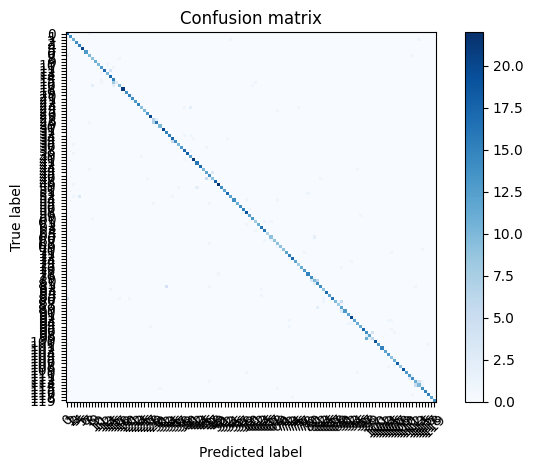

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predictions
y_pred = inception_model.predict(inception_ds_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = np.concatenate([y for x, y in inception_ds_test], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=range(ds_info.features['label'].num_classes))

# **5. Write-Up**

*   Document your process, model architecture choices, and results in a report.
*   Discuss any challenges faced and how you overcame them.
*   Provide insights on what worked well and what didn’t.



**Introduction**

*   **Project Overview:**  Implement a deep learning model to classify images from the Stanford Dogs dataset.

*   **Objective:** To develop an accurate and efficient model for dog breed classification.  



**Data Preparation**


*   **Dataset:** The Stanford Dogs dataset, which contains images of various dog breeds.
*   **Data Splitting:** The dataset is divided into training (70%), validation (15%), and test sets (15%).
*   **Data Preprocessing:** Images are resized. Apply specific preprocessing for VGG and Inception model.





**Model Building**

*   **AlexNet Model**

**Preprocessing:** Images are resized to 224x224 pixels and normalized to have pixel values between 0 and 1.



**Model Architecture**

Architecture Overview: A modified version of AlexNet is used, with several convolutional, max-pooling, and fully connected layers.

Layers Configuration:
1. Convolutional layers with varying filter sizes (48, 128, 192) and 3x3 kernels.
2. MaxPooling layers following some of the convolutional layers.
3. Fully connected layers with 1024 neurons each and dropout layers for regularization.
4. The output layer with softmax activation for multi-class classification.

Input Shape: The input shape is set to 224x224x3 to match the preprocessed image dimensions.



**Results:**

Training and Validation Loss/Accuracy:
The training accuracy remained extremely low (~0.9%), indicating that the model did not learn effectively. The validation accuracy was around 0.28%, which is very low and suggests the model did not generalize well.

**Challenges:**

Overfitting is not observed due to very low accuracy.
Underfitting is the major issue, as the model failed to learn effectively.

**Insights and Future Work:**

The preprocessing steps were appropriate for the AlexNet architecture. The modified AlexNet model did not learn effectively, evident from the stagnant low accuracy. Next Steps:
Investigate the cause of underfitting.
Experiment with different architectures, such as VGG or Inception.



*   **VGG Model**

**Preprocessing:**
Resizing images to 224x224 pixels.
Applying VGG16 specific preprocessing.

**Data Augmentation:**
Rotation, width/height shift, shear, zoom, horizontal flip.
Aimed at improving model robustness and generalization.

**Model Architecture**

Base Model: VGG16, pre-trained on ImageNet, with weights frozen during initial training.

Custom Layers:
1. Global Average Pooling layer to reduce dimensionality.
2. Dense layer with 512 neurons and L2 regularization.
3. Batch Normalization and Dropout for regularization.
4. Output layer with softmax activation for classification.

Input Shape: 224x224x3 to match the preprocessed image dimensions.

**Results:**

Significant improvement in accuracy compared to the previous model.
Training accuracy reached ~98%, and validation accuracy ~73%.
Loss decreased consistently, showing effective learning.

**Challenges:**

Overfitting is managed effectively through data augmentation and regularization techniques.
VGG16 is more complex but provided better features for classification.
Custom scheduler and callbacks helped in fine-tuning the learning rate for better convergence.

**Insights and Future Work:**

VGG16 base model, data augmentation, and regularization techniques greatly improved accuracy. Further fine-tune the model or explore other architectures like Inception.

*   **Inception Model**

**Preprocessing:**
Resizing images to 299x299 pixels for InceptionV3.
Applying InceptionV3-specific normalization.

**Enhanced Data Augmentation:**
Techniques Used:
Random flips, rotations, zooms, and translations.
Aimed to improve the model's robustness and ability to generalize.

**Model Architecture**

Base Model: Pre-trained InceptionV3, with weights frozen.

Custom Layers:
1. Data augmentation layers applied directly to the model's input.
2. Global Average Pooling layer.
3. Dense layer with 1024 neurons, L2 regularization, Batch Normalization, and increased dropout (0.6).
4. Output layer with softmax activation.

Input Shape: 299x299x3, aligned with InceptionV3 requirements.

**Results:**

Training accuracy peaked at ~96%, and validation accuracy around 90%. Significant improvement in both training and validation metrics compared to previous models.

**Challenges:**

Complex Architecture is managed by freezing the base model's weights and focusing on training custom top layers. Learning rate scheduling and callbacks effectively managed the learning rate.

**Insights:**

Enhanced data augmentation and the InceptionV3 architecture significantly improved model performance.


**Model Evaluation**

Results: The model achieved a test accuracy of 88.28%, which is a strong indication of its performance on unseen data.